*Giménez Arias, Carolina*

*Pons Suñer, Pedro*

## Consumidor con recuento de menciones

Este consumidor se encarga de contar el número de menciones a cada partido político y de graficar la suma acumulada de menciones en tiempo real usando un gráfico de barras.

Los tweets son consumidos del topic *tweetsProcessed*, que son producidos en el script *ConsumerProducer*.

In [5]:
# Cargamos las librerías a usar:
import matplotlib.pyplot as plt
from confluent_kafka import Consumer, KafkaError
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.dates as mdates
import datetime,re

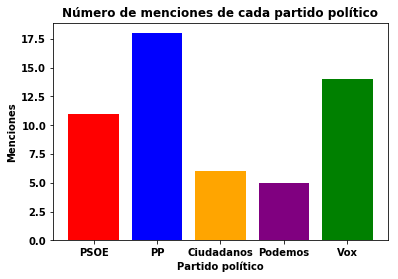

In [ ]:
cons = Consumer({
    'bootstrap.servers': 'localhost:9092',
    'group.id': 'mygroupBar',
})

cons.subscribe(['tweetsProcessed'])
first_run=True

while True:
    
    msg = cons.poll(1.0) #espera un segundo, si en ese segundo nos llega algo lo usa

    if msg is None:
        continue
    tweet_info=msg.value().decode('utf-8') #Muy importante: codificación utf-8
    tweet_info=tweet_info.replace("\\\"","\"")
    #print(tweet_info)
    
    if first_run == True:
        a=b=c=d=e=0 #Creamos vectores vacíos para rellenar luego
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1) 
        first_run = False 
    # Nos quedamos con la parte del tweet que nos interesa (el mensaje) y contamos el número de veces 
    # que aparece cada partido
    a += re.search("text\": (.*), \"user\":",tweet_info)[0][8:-10].count('PSOE')
    b += re.search("text\": (.*), \"user\":",tweet_info)[0][8:-10].count('PP')
    c += re.search("text\": (.*), \"user\":",tweet_info)[0][8:-10].count('CIUDADANOS')
    d += re.search("text\": (.*), \"user\":",tweet_info)[0][8:-10].count('PODEMOS')
    e += re.search("text\": (.*), \"user\":",tweet_info)[0][8:-10].count('VOX')
    
    # Ploteamos
    ax.cla()
    ax.set_title("Número de menciones de cada partido político")
    ax.set_xlabel("Partido político")
    ax.set_ylabel("Menciones")
    
    ax.bar(['PSOE', 'PP', 'Ciudadanos','Podemos','Vox'],[a, b, c, d, e], color = ["Red","Blue","Orange","Purple","Green"])
    display(fig)
    clear_output(wait = True)
    plt.pause(0.5)
    

cons.close()